## IMPORT

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn import preprocessing, tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [27]:
ar = pd.read_csv("application_record.csv")
cr = pd.read_csv("credit_record.csv")

## PREPROCESSING


In [28]:
ar.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [29]:
ar["AGE"] = (ar.DAYS_BIRTH * -1) // 365
ar.head(20)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,32
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,32
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,58
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,61
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,61
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,61


In [30]:
ar = ar.replace(365243,0)
ar["WORKING_YEAR"] = np.where(((ar.DAYS_EMPLOYED) > -365) & ((ar.DAYS_EMPLOYED) < 0), 1, (ar.DAYS_EMPLOYED * -1) // 365)
ar.head(20)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,WORKING_YEAR
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,32,12
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,32,12
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,58,3
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52,8
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52,8
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52,8
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52,8
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,0,1,0,0,0,NaN,1.0,61,0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,0,1,0,0,0,NaN,1.0,61,0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,0,1,0,0,0,NaN,1.0,61,0


In [31]:
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [32]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [33]:
ar['OCCUPATION_TYPE'] = np.where((ar['OCCUPATION_TYPE'].isnull()) & (ar['WORKING_YEAR'] == 0), 'Not working', ar['OCCUPATION_TYPE'])
ar.head(20)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,WORKING_YEAR
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,32,12
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,32,12
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,58,3
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52,8
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52,8
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52,8
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52,8
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,0,1,0,0,0,Not working,1.0,61,0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,0,1,0,0,0,Not working,1.0,61,0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,0,1,0,0,0,Not working,1.0,61,0


In [34]:
ar['OCCUPATION_TYPE'] = ar['OCCUPATION_TYPE'].replace(np.nan,'Others')
ar.head(15)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,WORKING_YEAR
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Others,2.0,32,12
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Others,2.0,32,12
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,58,3
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52,8
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52,8
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52,8
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52,8
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,0,1,0,0,0,Not working,1.0,61,0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,0,1,0,0,0,Not working,1.0,61,0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,0,1,0,0,0,Not working,1.0,61,0


In [35]:
del ar["DAYS_BIRTH"]
del ar["DAYS_EMPLOYED"]
ar.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,WORKING_YEAR
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,Others,2.0,32,12
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,Others,2.0,32,12
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,58,3
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52,8
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52,8


In [36]:
ar.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
AGE                    0
WORKING_YEAR           0
dtype: int64

In [37]:
ar.CODE_GENDER = ar.CODE_GENDER.map({"F":0,"M":1})

ar.FLAG_OWN_CAR = ar.FLAG_OWN_CAR.map({"N":0,"Y":1})

ar.FLAG_OWN_REALTY = ar.FLAG_OWN_REALTY.map({"N":0,"Y":1})

In [38]:
cr.STATUS = cr.STATUS.map({"X":1,"C":1, "0":1, "1":0, "2":0, "3":0, "4":0, "5":0})
cr.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,1
1,5001711,-1,1
2,5001711,-2,1
3,5001711,-3,1
4,5001712,0,1


In [39]:
grouped = cr.groupby('ID')

pivot_tb = cr.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')

#Counting number of good and bad record.
pivot_tb['GOOD'] = pivot_tb[pivot_tb.iloc[:,0:61] == 1].count(axis = 1)
pivot_tb['BAD'] = pivot_tb[pivot_tb.iloc[:,0:61] == 0].count(axis = 1)

pivot_tb.sort_values("BAD")

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,-7,-6,-5,-4,-3,-2,-1,0,GOOD,BAD
ID,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,4,0
5091940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,13,0
5091941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,0
5091943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,25,0
5091946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116304,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,46
5117313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,48
5142361,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,11,48


In [40]:
pivot_tb.reset_index(inplace=True)
pivot_tb

MONTHS_BALANCE,ID,-60,-59,-58,-57,-56,-55,-54,-53,-52,...,-7,-6,-5,-4,-3,-2,-1,0,GOOD,BAD
0,5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,4,0
1,5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,19,0
2,5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,22,0
3,5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,15,0
4,5001715,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45980,5150482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,0
45981,5150483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,18,0
45982,5150484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,13,0
45983,5150485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2,0


In [41]:
pivot_tb['STATUS'] = np.where(((pivot_tb['GOOD'] < pivot_tb['BAD']) | (pivot_tb[0] == 0) | (pivot_tb[-1] == 0) | (pivot_tb[-2] == 0)), 0, 1)
pivot_tb.sort_values("STATUS")


MONTHS_BALANCE,ID,-60,-59,-58,-57,-56,-55,-54,-53,-52,...,-6,-5,-4,-3,-2,-1,0,GOOD,BAD,STATUS
40486,5126463,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,27,0
25810,5078589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,6,11,0
25809,5078588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,8,2,0
25808,5078587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,36,1,0
44483,5146528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,1.0,1.0,0.0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15474,5042122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,19,0,1
15475,5042123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,19,0,1
15476,5042124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,18,0,1
15502,5042161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,0,1


In [42]:
datacredit = ar.merge(pivot_tb, how='inner', on=['ID'])
datacredit.sort_values("STATUS")

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,-6,-5,-4,-3,-2,-1,0,GOOD,BAD,STATUS
9188,5041333,0,0,1,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,22,2,0
3887,5023685,1,1,1,0,279000.0,Commercial associate,Higher education,Married,House / apartment,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,25,1,0
21957,5091333,0,0,1,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,...,NaN,1.0,1.0,1.0,1.0,0.0,1.0,5,1,0
14745,5061290,0,0,1,0,135000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,15,1,0
3817,5023592,1,0,0,0,202500.0,Working,Secondary / secondary special,Separated,House / apartment,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,16,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12230,5050962,1,0,0,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,43,0,1
12231,5050963,1,0,0,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,41,0,1
12232,5050965,1,0,0,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,25,0,1
12225,5050954,1,0,0,0,270000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,25,0,1


In [43]:
datacredit.drop(datacredit.iloc[:, -64:-1], inplace=True, axis=1)

In [44]:
datacredit = datacredit.drop(['ID', 'FLAG_MOBIL', 'FLAG_EMAIL', 'CODE_GENDER', 'CNT_CHILDREN', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 'CNT_FAM_MEMBERS',
                              'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_PHONE', 'NAME_INCOME_TYPE'], axis=1)

In [45]:
datacredit.groupby('STATUS').size()

STATUS
0      723
1    35734
dtype: int64

##### SUMMARY

In [46]:
# total = sum(datacredit.STATUS==0) + sum(datacredit.STATUS==1)
# badrate = (sum(datacredit.STATUS==0)/total) * 100
# goodrate = (sum(datacredit.STATUS==1)/total) * 100

# print ("Bad Applicat Rate : " + str(round(badrate,2)) + "%" )
# print ("Good Applicant Rate : " + str(round(goodrate,2)) + "%")
# print ("Total Applicant : " + str(total))

## MODELING

#### MODEL 1 -- LOGISTIC REGRESSION

In [47]:
# features1 = ['NAME_INCOME_TYPE']

# le = preprocessing.LabelEncoder()

# for col in features1:
#     datacredit[col] = le.fit_transform(datacredit[col].values)
# print(f"\n{features1[0]}")
# for i, features in enumerate(le.classes_):
#     print(features, "=", i)

In [48]:
features2 = ['NAME_EDUCATION_TYPE']
le = preprocessing.LabelEncoder()

for col in features2:
    datacredit[col] = le.fit_transform(datacredit[col].values)
print(f"\n{features2[0]}")
for i, features in enumerate(le.classes_):
    print(features, "=", i)


NAME_EDUCATION_TYPE
Academic degree = 0
Higher education = 1
Incomplete higher = 2
Lower secondary = 3
Secondary / secondary special = 4


In [49]:
features3 = ['NAME_FAMILY_STATUS']

le = preprocessing.LabelEncoder()

for col in features3:
    datacredit[col] = le.fit_transform(datacredit[col].values)
print(f"\n{features3[0]}")
for i, features in enumerate(le.classes_):
    print(features, "=", i)


NAME_FAMILY_STATUS
Civil marriage = 0
Married = 1
Separated = 2
Single / not married = 3
Widow = 4


In [50]:
# features4 = ['NAME_HOUSING_TYPE']

# le = preprocessing.LabelEncoder()

# for col in features4:
#     datacredit[col] = le.fit_transform(datacredit[col].values)
# print(f"\n{features4[0]}")
# for i, features in enumerate(le.classes_):
#     print(features, "=", i)

In [51]:
features5 = ['OCCUPATION_TYPE']

le = preprocessing.LabelEncoder()

for col in features5:
    datacredit[col] = le.fit_transform(datacredit[col].values)
print(f"\n{features5[0]}")
for i, features in enumerate(le.classes_):
    print(features, "=", i)


OCCUPATION_TYPE
Accountants = 0
Cleaning staff = 1
Cooking staff = 2
Core staff = 3
Drivers = 4
HR staff = 5
High skill tech staff = 6
IT staff = 7
Laborers = 8
Low-skill Laborers = 9
Managers = 10
Medicine staff = 11
Not working = 12
Others = 13
Private service staff = 14
Realty agents = 15
Sales staff = 16
Secretaries = 17
Security staff = 18
Waiters/barmen staff = 19


In [52]:
datacredit.head(10)

,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,OCCUPATION_TYPE,AGE,WORKING_YEAR,STATUS
0,427500.0,1,0,13,32,12,1
1,427500.0,1,0,13,32,12,1
2,112500.0,4,1,18,58,3,1
3,270000.0,4,3,16,52,8,1
4,270000.0,4,3,16,52,8,1
5,270000.0,4,3,16,52,8,1
6,270000.0,4,3,16,52,8,1
7,283500.0,1,2,12,61,0,1
8,283500.0,1,2,12,61,0,1
9,283500.0,1,2,12,61,0,1


In [53]:
# le.fit(features['NAME_INCOME_TYPE'])
# for col in features:
#     distinct_values = sorted(datacredit[col].unique())
#     print(f"\n{col}:\nValue Encode\tAsli")

In [54]:
# datacredit['label'] = le.fit_transform(datacredit['NAME_EDUCATION_TYPE'])
# datacredit['NAME_EDUCATION_TYPE']

In [55]:
X = datacredit.drop(['STATUS'],axis=1)
y = datacredit.STATUS
X

,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,OCCUPATION_TYPE,AGE,WORKING_YEAR
0,427500.0,1,0,13,32,12
1,427500.0,1,0,13,32,12
2,112500.0,4,1,18,58,3
3,270000.0,4,3,16,52,8
4,270000.0,4,3,16,52,8
...,...,...,...,...,...,...
36452,315000.0,4,1,10,47,6
36453,157500.0,1,1,11,33,3
36454,157500.0,1,1,11,33,3
36455,283500.0,4,1,16,49,1


In [56]:
# #under sampling, imbalanced data
rus = RandomUnderSampler(sampling_strategy=1)
X_res_under, y_res_under = rus.fit_resample(X,y)
y_res_under.value_counts()

0    723
1    723
Name: STATUS, dtype: int64

In [57]:
# #over sampling, imbalanced data
ros = RandomOverSampler(random_state=0)
X_res, y_res = ros.fit_resample(X,y)
y_res.value_counts()

1    35734
0    35734
Name: STATUS, dtype: int64

In [58]:
X_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71468 entries, 0 to 71467
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AMT_INCOME_TOTAL     71468 non-null  float64
 1   NAME_EDUCATION_TYPE  71468 non-null  int32  
 2   NAME_FAMILY_STATUS   71468 non-null  int32  
 3   OCCUPATION_TYPE      71468 non-null  int32  
 4   AGE                  71468 non-null  int64  
 5   WORKING_YEAR         71468 non-null  int64  
dtypes: float64(1), int32(3), int64(2)
memory usage: 2.5 MB


In [59]:
datacredit.duplicated().any()

True

In [60]:
# sc = preprocessing.StandardScaler()
# x_scaled = sc.fit_transform(X_res)

In [61]:
# oversample
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)

In [62]:
#undersample
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_res_under, y_res_under, test_size=0.2, random_state=0)

In [63]:
# print('X_train :', X_train.shape)
# print('X_test :', X_test.shape)
# print('y_train :', y_train.shape)
# print('y_test :', y_test.shape)

In [64]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_predict = model1.predict(X_test)
print('Accuracy Score is' ,accuracy_score(y_test,y_predict))

Accuracy Score is 0.5242759199664194


In [65]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.54      0.36      0.43      7217
           1       0.51      0.69      0.59      7077

    accuracy                           0.52     14294
   macro avg       0.53      0.53      0.51     14294
weighted avg       0.53      0.52      0.51     14294



In [66]:
# model1 = LogisticRegression()
model1.fit(X_train_under, y_train_under)
y_predict_under = model1.predict(X_test_under)
print('Accuracy Score is' ,accuracy_score(y_test_under,y_predict_under))

Accuracy Score is 0.506896551724138


In [67]:
print(classification_report(y_test_under, y_predict_under))

              precision    recall  f1-score   support

           0       0.51      1.00      0.67       147
           1       0.00      0.00      0.00       143

    accuracy                           0.51       290
   macro avg       0.25      0.50      0.34       290
weighted avg       0.26      0.51      0.34       290



c:\Users\frans\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\frans\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\frans\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

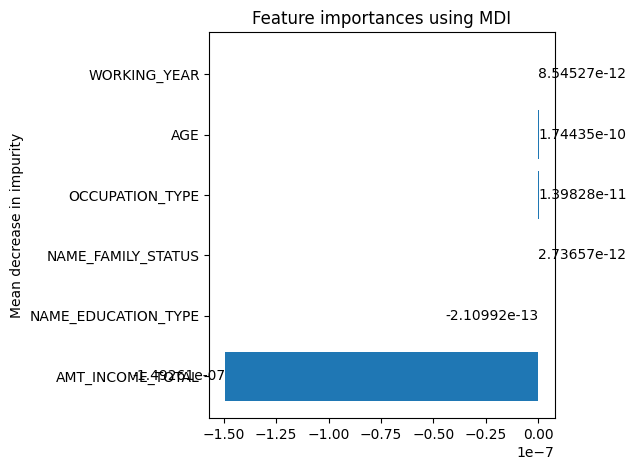

In [68]:
feature_names = X_train.columns
importances = model1.coef_[0]
# std = np.std([tree.feature_importances_ for tree in model1.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
bars = ax.barh(feature_names, forest_importances)
ax.bar_label(bars)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### MODEL 2 -- DECISION TREE

In [69]:
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
y_predict2 = model2.predict(X_test)
print('Accuracy Score is' ,accuracy_score(y_test,y_predict2))

Accuracy Score is 0.9535469427731915


In [70]:
print(classification_report(y_test, y_predict2))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7217
           1       1.00      0.91      0.95      7077

    accuracy                           0.95     14294
   macro avg       0.96      0.95      0.95     14294
weighted avg       0.96      0.95      0.95     14294



In [71]:
X

,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,OCCUPATION_TYPE,AGE,WORKING_YEAR
0,427500.0,1,0,13,32,12
1,427500.0,1,0,13,32,12
2,112500.0,4,1,18,58,3
3,270000.0,4,3,16,52,8
4,270000.0,4,3,16,52,8
...,...,...,...,...,...,...
36452,315000.0,4,1,10,47,6
36453,157500.0,1,1,11,33,3
36454,157500.0,1,1,11,33,3
36455,283500.0,4,1,16,49,1


In [72]:
# model2 = DecisionTreeClassifier()
model2.fit(X_train_under, y_train_under)
y_predict2_under = model2.predict(X_test_under)
print('Accuracy Score is' ,accuracy_score(y_test_under,y_predict2_under))

Accuracy Score is 0.5724137931034483


In [73]:
print(classification_report(y_test_under, y_predict2_under))

              precision    recall  f1-score   support

           0       0.57      0.63      0.60       147
           1       0.57      0.51      0.54       143

    accuracy                           0.57       290
   macro avg       0.57      0.57      0.57       290
weighted avg       0.57      0.57      0.57       290



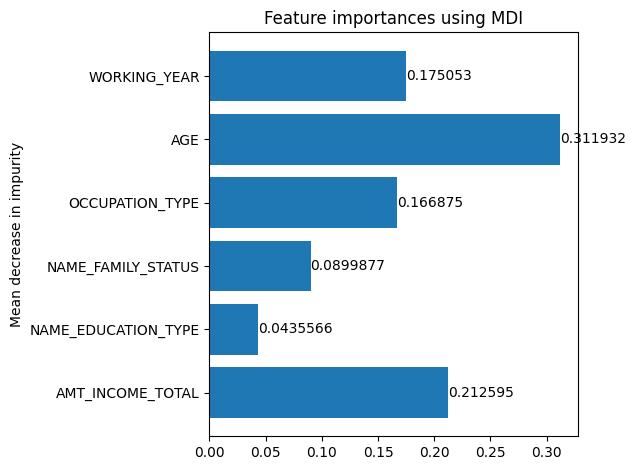

In [74]:
feature_names = X_train.columns
importances = model2.feature_importances_
# std = np.std([tree.feature_importances_ for tree in model2.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
bars = ax.barh(feature_names, forest_importances)
ax.bar_label(bars)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [75]:
# class_names = ['Low Risk', 'High Risk']
# feature_names = list(datacredit.columns)
# plt.figure(figsize=(200,80))
# tree.plot_tree(model2, fontsize=14, class_names=class_names, feature_names=feature_names, filled=True, rounded=True)
# plt.show()

#### MODEL 3 -- RANDOM FOREST

In [76]:
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)
y_predict3 = model3.predict(X_test)
print('Accuracy Score is' ,accuracy_score(y_test,y_predict3))

Accuracy Score is 0.9569749545263747


In [77]:
print(classification_report(y_test, y_predict3))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7217
           1       1.00      0.91      0.95      7077

    accuracy                           0.96     14294
   macro avg       0.96      0.96      0.96     14294
weighted avg       0.96      0.96      0.96     14294



In [78]:
# model3 = RandomForestClassifier()
model3.fit(X_train_under, y_train_under)
y_predict3_under = model3.predict(X_test_under)
print('Accuracy Score is' ,accuracy_score(y_test_under,y_predict3_under))

Accuracy Score is 0.5655172413793104


In [79]:
print(classification_report(y_test_under, y_predict3_under))

              precision    recall  f1-score   support

           0       0.57      0.61      0.59       147
           1       0.56      0.52      0.54       143

    accuracy                           0.57       290
   macro avg       0.57      0.56      0.56       290
weighted avg       0.57      0.57      0.56       290



In [80]:
# labels = list(X_train.columns)
# coeff = list(model2.coef_[0])
# coeff = sorted(coeff)
# sorted_coeff = list(range(len(coeff)))

# fig, ax = plt.subplot(figsize=(22,8))

# ax.barh(sorted_coeff, coeff)
# ax.set_yticks(sorted_coeff)
# ax.set_ytickslabels(labels)

In [81]:
# feature_names = X_train.columns
# importances = model3.feature_importances_
# std = np.std([tree.feature_importances_ for tree in model3.estimators_], axis=0)
# forest_importances = pd.Series(importances, index=feature_names)

# fig, ax = plt.subplots()
# forest_importances.plot.bar(yerr=std, ax=ax)
# ax.set_title("Feature importances using MDI")
# ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()


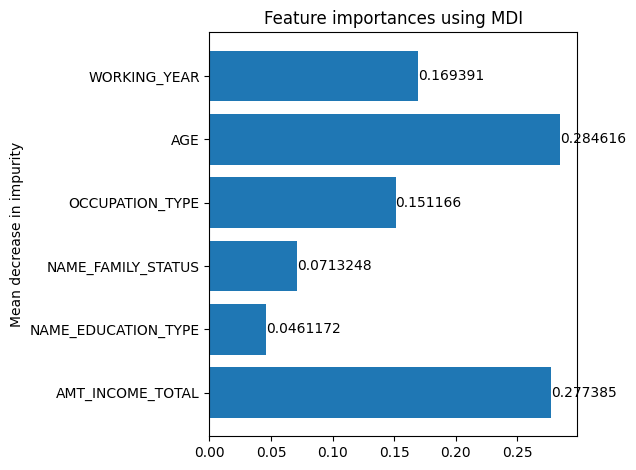

In [82]:
feature_names = X_train.columns
importances = model3.feature_importances_
std = np.std([tree.feature_importances_ for tree in model3.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
bars = ax.barh(feature_names, forest_importances)
ax.bar_label(bars)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### SAVE MODEL

In [83]:
filename = 'credit_model.sav'
pickle.dump(model2,open(filename, 'wb'))